In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\AirQualityUCI.xlsx")

In [3]:
df = df.drop(columns=['Date','Time','PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','T','AH'])

In [4]:
df

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),RH
0,2.6,150,11.881723,166.0,113.0,48.875001
1,2.0,112,9.397165,103.0,92.0,47.700000
2,2.2,88,8.997817,131.0,114.0,53.975000
3,2.2,80,9.228796,172.0,122.0,60.000000
4,1.6,51,6.518224,131.0,116.0,59.575001
...,...,...,...,...,...,...
9352,3.1,-200,13.529605,471.7,189.8,29.250000
9353,2.4,-200,11.355157,353.3,179.2,23.725000
9354,2.4,-200,12.374538,293.0,174.7,18.350000
9355,2.1,-200,9.547187,234.5,155.7,13.550000


In [5]:
df.replace(-200, np.nan, inplace=True)
df.fillna(df.mean(), inplace=True)

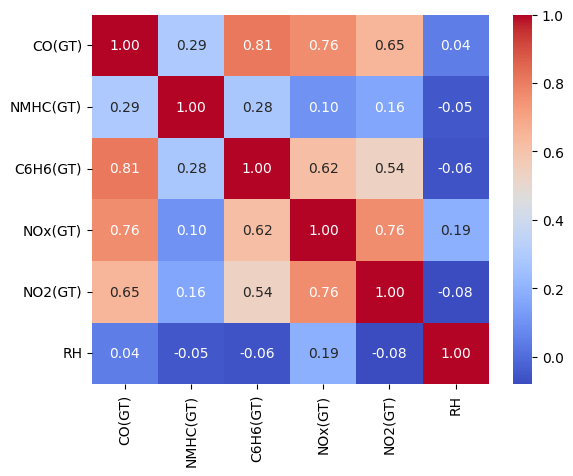

In [6]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [7]:
from scipy import stats

In [8]:
X = df.drop(columns=['RH'])
y = df['RH']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [11]:

X_train_np = np.c_[np.ones(X_train.shape[0]), X_train]  
theta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train

y_train_pred = X_train_np @ theta

In [12]:
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)
y_train_pred_sklearn = model_sklearn.predict(X_train)

In [13]:
X_test_np = np.c_[np.ones(X_test.shape[0]), X_test]  
y_test_pred = X_test_np @ theta
y_test_pred_sklearn = model_sklearn.predict(X_test)

In [14]:
r2_score_custom = r2_score(y_test, y_test_pred)
r2_score_sklearn = r2_score(y_test, y_test_pred_sklearn)

mse_custom = mean_squared_error(y_test, y_test_pred)
mse_sklearn = mean_squared_error(y_test, y_test_pred_sklearn)

In [15]:
print("R2 Score (Custom):", r2_score_custom)
print("R2 Score (sklearn):", r2_score_sklearn)
print("\nMean Squared Error (Custom):", mse_custom)
print("Mean Squared Error (sklearn):", mse_sklearn)

R2 Score (Custom): 0.2200807075725787
R2 Score (sklearn): 0.2200807075725797

Mean Squared Error (Custom): 226.25113237113203
Mean Squared Error (sklearn): 226.25113237113175
